# Introduction to Regression with Neuaral Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [2]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

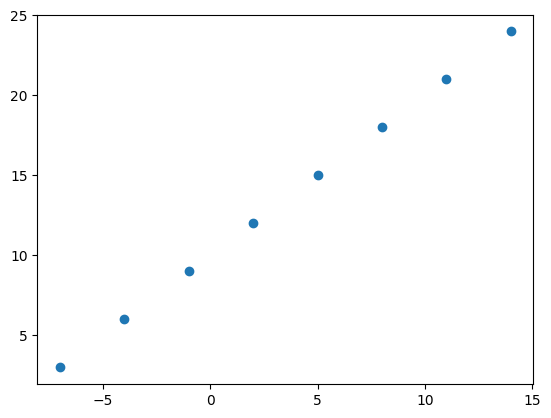

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
x[0], y[0]

(-7.0, 3.0)

In [7]:
x[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
x[0].ndim

0

In [10]:
x[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our NumPy arrays into tensors with dtype float32
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

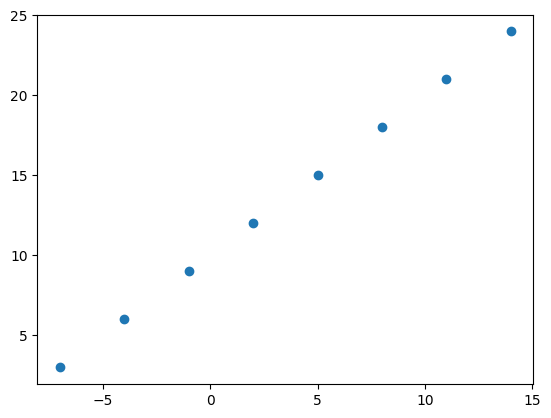

In [13]:
plt.scatter(x, y)

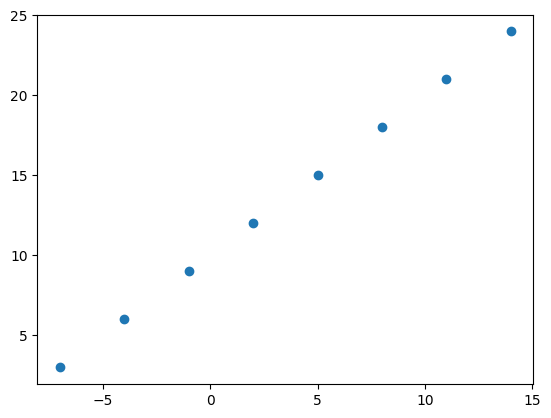

In [14]:
plt.scatter(x, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - Letting the model try to find patterns between x & y (features and labels).

In [15]:
# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=5)  # Use x_reshaped instead of x

Epoch 1/5
1/1 [==============================] - 1s 619ms/step - loss: 7.5239 - mae: 7.5239
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 7.4756 - mae: 7.4756


In [16]:
# Check out reshaped_x and y
x_reshaped, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 109ms/step


array([[29.661789]], dtype=float32)

In [18]:
y_pred + 11

array([[40.66179]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimnization function

3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [19]:
# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=100)  # Use x_reshaped instead of x

Epoch 1/100
1/1 [==============================] - 0s 488ms/step - loss: 11.5818 - mae: 11.5818
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4493 - mae: 11.4493
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 11.3168 - mae: 11.3168
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1843 - mae: 11.1843
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0518 - mae: 11.0518
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9193 - mae: 10.9193
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7868 - mae: 10.7868
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6543 - mae: 10.6543
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5218 - mae: 10.5218
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3893 - mae: 10.3893
Epoch 11/100
1/1 [==============================

In [20]:
# Lets see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 130ms/step


array([[29.784462]], dtype=float32)

In [25]:
# Lets see if we can make another to improve our model
# Changing layers to 50
# changing activation to none
# Change the optimizer to Adam
# introduce learning rate to 0.01

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae is short for mean absolute error #just writing mae is enough
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=100)  # Use x_reshaped instead of x

Epoch 1/100
1/1 [==============================] - 1s 641ms/step - loss: 14.9280 - mae: 14.9280
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.8606 - mae: 14.8606
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.7933 - mae: 14.7933
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 14.7261 - mae: 14.7261
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.6590 - mae: 14.6590
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5920 - mae: 14.5920
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 14.5251 - mae: 14.5251
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.4583 - mae: 14.4583
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3915 - mae: 14.3915
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 14.3248 - mae: 14.3248
Epoch 11/100
1/1 [==============================

In [26]:
# Lets try to make a prediction

model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[24.785606]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```




When it comes to evaluation... there are 3 words you should memorize:

# > "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* the model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [27]:
# Make a bigger data set
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

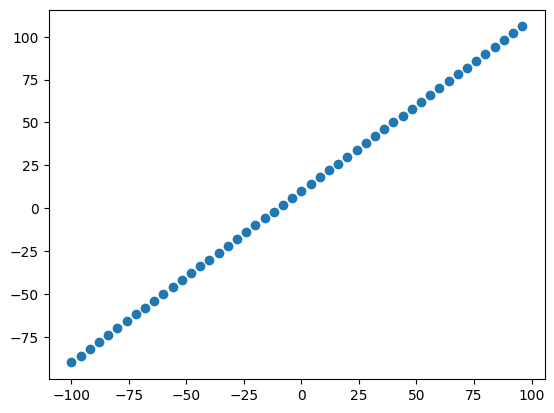

In [30]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)